Import the required libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Print the library versions to avoid conflicts

In [57]:
print(f'Pandas Version: {pd.__version__}') 
print(f'Numpy Version: {np.__version__}') 
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')

Pandas Version: 1.5.3
Numpy Version: 1.23.5
Matplotlib version: 3.7.0
Seaborn version: 0.12.2


Add some configurations

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Load the corresponding datasets

In [59]:
ds_titanic_train = pd.read_csv("Datasets/train.csv", encoding='unicode_escape')#, dtype = {"Sex": "category"})
ds_work = ds_titanic_train.copy()

ds_titanic_test = pd.read_csv("Datasets/test.csv", encoding='unicode_escape')#,  dtype = {"Sex": "category"})
ds_test = ds_titanic_test.copy()

# Checking features, shape and correct load of the dataset

First 10 registers

In [60]:
ds_work.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


Last 10 registers

In [61]:
ds_work.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0000,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0000,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q


10 random registers

In [62]:
ds_work.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0000,0,0,111428,26.5500,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0000,0,1,PC 17558,247.5208,B58 B60,C
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0000,0,0,2694,7.2250,NaN,C
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0000,0,0,350029,7.8542,NaN,S
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0000,0,0,240929,12.6500,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0000,1,0,113773,53.1000,D30,S
418,419,0,2,"Matthews, Mr. William John",male,30.0000,0,0,28228,13.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0000,1,0,PC 17572,76.7292,D33,C


Features of the dataset

In [63]:
ds_work.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Shape of the dataset

In [64]:
ds_work.shape

(891, 12)

# Null values

In [65]:
ds_work.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Out of 891 registers, 687 contain null values for the feature cabin (About 77% of the registers). Considering that it doesn't seem to be a relevant feature to our analysis, we could remove it.

In [66]:
ds_work.drop(["Cabin"], axis = 1, inplace = True)

For age, it seems like a more relevant feature. We could lose valuable information by removing 177 rows out of 891 (About 20% of data), so we can replace null values with zeros.

In [67]:
ds_work["Age"].fillna(0, inplace = True)

For embarked, we can check the rows with Nan values

In [68]:
ds_work[ds_work["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0000,0,0,113572,80.0000,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0000,0,0,113572,80.0000,NaN


We could drop these rows

In [69]:
ds_work.dropna(inplace = True)

There are no more null values

In [70]:
ds_work.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Correlation between features

<Axes: >

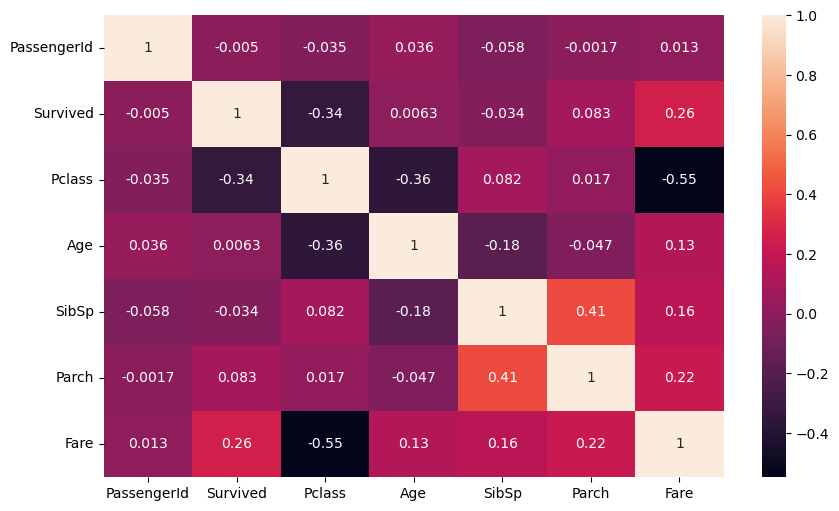

In [71]:
corr = ds_work.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True)

There doesn't seem to be a strong relationship between any 2 features in the dataset

# Optimizing memory usage

Information about the features, amount of null values, data type of each feature, and others

In [72]:
ds_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Memory usage of each feature

In [73]:
ds_work.memory_usage()

Index          7112
PassengerId    7112
Survived       7112
Pclass         7112
Name           7112
Sex            7112
Age            7112
SibSp          7112
Parch          7112
Ticket         7112
Fare           7112
Embarked       7112
dtype: int64

Now, we change the data type of some features to save memory, but without losing info of the features.

These features have a small range value (PassengerId from 1 to 891; Survived only 0 and 1; Pclass from 1 to 3; SibSp from 0 to 8; Parch from 0 to 6; Fare from 0 to 512.3292; Age from 0 to 80), so we can use a smaller data type for them

In [74]:
ds_work["PassengerId"] = ds_work["PassengerId"].astype("int16")
ds_work["Survived"] = ds_work["Survived"].astype("int8")
ds_work["Pclass"] = ds_work["Pclass"].astype("int8")
ds_work["SibSp"] = ds_work["SibSp"].astype("int8")
ds_work["Parch"] = ds_work["Parch"].astype("int8")
ds_work["Fare"] = ds_work["Fare"].astype("float16")
ds_work["Age"] = ds_work["Age"].astype("float16")

These features only take specific values (Sex takes male and female; Embarked takes S, C, Q or nan), so we can reduce them to categorical features

In [75]:
ds_work["Sex"] = ds_work["Sex"].astype("category")
ds_work["Embarked"] = ds_work["Embarked"].astype("category")

In [76]:
ds_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int16   
 1   Survived     889 non-null    int8    
 2   Pclass       889 non-null    int8    
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float16 
 6   SibSp        889 non-null    int8    
 7   Parch        889 non-null    int8    
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float16 
 10  Embarked     889 non-null    category
dtypes: category(2), float16(2), int16(1), int8(4), object(2)
memory usage: 31.5+ KB


In [77]:
ds_work.memory_usage()

Index          7112
PassengerId    1778
Survived        889
Pclass          889
Name           7112
Sex            1013
Age            1778
SibSp           889
Parch           889
Ticket         7112
Fare           1778
Embarked       1021
dtype: int64

Even though the dataset is small (Only 891 registers), we reduced the memory usage from 83 KB to 31 KB

# Check feature values

Possible values of all the features

In [78]:
for col in ds_work.columns:
  print('variable:', col)
  print(ds_work[col].value_counts(dropna=False).to_string())
  print('_________________________') 

variable: PassengerId
1      1
599    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
596    1
597    1
598    1
600    1
586    1
601    1
602    1
603    1
604    1
605    1
606    1
607    1
608    1
609    1
610    1
611    1
587    1
585    1
613    1
571    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
567    1
568    1
569    1
570    1
572    1
584    1
573    1
574    1
575    1
576    1
577    1
578    1
579    1
580    1
581    1
582    1
583    1
612    1
614    1
447    1
655    1
644    1
645    1
646    1
647    1
648    1
649    1
650    1
651    1
652    1
653    1
654    1
656    1
642    1
657    1
658    1
659    1
660    1
661    1
662    1
663    1
664    1
665    1
666    1
667    1
643    1
641    1
615    1
627    1
616    1
617    1
618    1
619    1
620    1
621    1
622    1
623    1
624    1
625    1
626    1
628    1
640    1
629    1
630    1
631    1
632    1
633    1
634    1
635    1
636    1
637    1
638   

2 things to note:
* Ages less than 1 and not 0 (Null values) are fractional
* Some tickets appear multiple times

Let's analyse each point

## Fractional ages

In [79]:
ds_work[(ds_work["Age"] < 1) & (ds_work["Age"] > 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.8301,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.9199,1,2,113781,151.5000,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2656,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2656,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.6699,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.4199,0,1,2625,8.5156,C
831,832,1,2,"Richards, Master. George Sibley",male,0.8301,1,1,29106,18.7500,S


There doesn't seem to be anything wrong

## Repeated tickets

In [80]:
ds_work[(ds_work["Age"] < 1) & (ds_work["Age"] > 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.8301,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.9199,1,2,113781,151.5000,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2656,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2656,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.6699,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.4199,0,1,2625,8.5156,C
831,832,1,2,"Richards, Master. George Sibley",male,0.8301,1,1,29106,18.7500,S


In [81]:
ds_work[ds_work["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,0.0000,8,2,CA. 2343,69.5625,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,0.0000,8,2,CA. 2343,69.5625,S
201,202,0,3,"Sage, Mr. Frederick",male,0.0000,8,2,CA. 2343,69.5625,S
324,325,0,3,"Sage, Mr. George John Jr",male,0.0000,8,2,CA. 2343,69.5625,S
792,793,0,3,"Sage, Miss. Stella Anna",female,0.0000,8,2,CA. 2343,69.5625,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,0.0000,8,2,CA. 2343,69.5625,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,0.0000,8,2,CA. 2343,69.5625,S


In [82]:
ds_work[ds_work["Ticket"] == "3101295"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0000,4,1,3101295,39.6875,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0000,4,1,3101295,39.6875,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0000,4,1,3101295,39.6875,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0000,0,5,3101295,39.6875,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0000,4,1,3101295,39.6875,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0000,4,1,3101295,39.6875,S


In [83]:
ds_work[ds_work["Ticket"] == "PC 17757"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0000,0,0,PC 17757,227.5000,C
557,558,0,1,"Robbins, Mr. Victor",male,0.0000,0,0,PC 17757,227.5000,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5000,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0000,0,0,PC 17757,227.5000,C


In [84]:
ds_work[ds_work["Ticket"] == "239853"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,0.0000,0,0,239853,0.0000,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,0.0000,0,0,239853,0.0000,S
466,467,0,2,"Campbell, Mr. William",male,0.0000,0,0,239853,0.0000,S


We could conclude that some repeated tickets come from members of certain families

In [85]:
ds_work[ds_work["Age"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,0.0000,0,0,330877,8.4609,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,0.0000,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,0.0000,0,0,2649,7.2266,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,0.0000,0,0,2631,7.2266,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0.0000,0,0,330959,7.8789,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,0.0000,0,0,349216,7.8945,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,0.0000,1,0,PC 17569,146.5000,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,0.0000,0,0,335677,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",male,0.0000,0,0,2677,7.2305,C
42,43,0,3,"Kraeff, Mr. Theodor",male,0.0000,0,0,349253,7.8945,C
